In [1]:
from cmdstanpy import CmdStanModel

from seaborn import jointplot
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


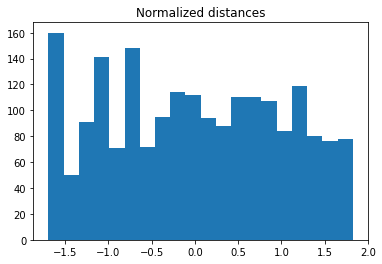

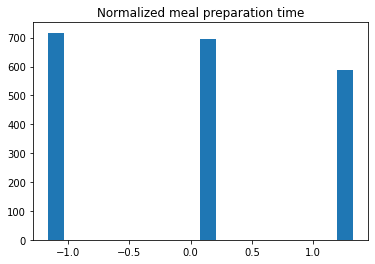

9.230165999999999
26.968


In [2]:
df = pd.read_csv('delivery_time_data.csv', delimiter=';', decimal=',')

df = df[df["Road distances [km]"] < 17.5]

# display(df.describe())

train_df = pd.DataFrame(df.iloc[:3000, :])
# normalized distance
train_df["Normalized distances"] = (train_df["Road distances [km]"] - train_df["Road distances [km]"].mean()) / train_df["Road distances [km]"].std()

# normalized distance
train_df["Normalized mealprep"] = (train_df["Meal_preparation_time"] - train_df["Meal_preparation_time"].mean()) / train_df["Meal_preparation_time"].std()

# train_df = train_df[train_df["Mean speed"] < 1.7]
plt.hist(train_df["Normalized distances"], bins=20)
plt.title("Normalized distances")
plt.show()

plt.hist(train_df["Normalized mealprep"], bins=20)
plt.title("Normalized meal preparation time")
plt.show()

print(train_df["Road distances [km]"].mean())
print(train_df["Time_taken(min)"].mean())

# display(train_df["Road_traffic_density"].value_counts())
# plt.title("Count of density type")
# plt.show()

# train_df["Mean speed"].describe()
# train_df["Time_taken(min)"].describe()
# train_df.head()

road_density_map = {'Jam ':1, 'High ':2, 'Medium ':3, 'Low ':4}

train_df["Road_traffic_density"] = train_df["Road_traffic_density"].apply(lambda x: road_density_map[x])


# PPC AND FIT WITH NORMALIZED DISTANCES

In [3]:
model_ppc=CmdStanModel(stan_file='norm_ppc.stan')

sim=model_ppc.sample(data={"N": len(train_df), "distance": train_df["Normalized distances"].values,
                           "meal_preparation_time": train_df["Normalized mealprep"].values,
                           "traffic_level" :train_df["Road_traffic_density"].values}, 
                     iter_sampling=1000,
                     iter_warmup=0, 
                     chains=1, 
                     fixed_param=True,
                     seed=20230613)
# ppc_df = sim.draws_pd()

# bins = np.linspace(0,100,100)

# mean_for_gamma = ppc_df.filter(regex="temp1.*")

# delivery = ppc_df.filter(regex="delivery_time.*")
# display(mean_for_gamma.iloc[0,:].describe())
# # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # delivery['value'].describe()
# # display(speed.loc[0,:].min())
# plt.hist(mean_for_gamma.values.flatten(), alpha=0.5, label="Mu")
# plt.title("Argument exponenty")
# plt.show()

# # mean_for_gamma = ppc_df.filter(regex="temp2.*")

# # delivery = ppc_df.filter(regex="delivery_time.*")
# # display(mean_for_gamma.iloc[0,:].describe())
# # # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # # delivery['value'].describe()
# # # display(speed.loc[0,:].min())
# # plt.hist(mean_for_gamma.values.flatten(), alpha=0.5, label="Mu")
# # plt.title("Exponenta bez dodawania meal prepa")
# # plt.show()

# mean_for_gamma1 = ppc_df.filter(regex="mu.*")

# # delivery = ppc_df.filter(regex="delivery_time.*")
# display(mean_for_gamma1.iloc[0,:].describe())
# # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # delivery['value'].describe()
# # display(speed.loc[0,:].min())
# plt.hist(mean_for_gamma1.values.flatten(), alpha=0.5, label="Mu")
# plt.title("Wynik exponenty")
# plt.show()

# # sigma = ppc_df.filter(regex="sigma.*")
# # print(f"Odchylenie =  {sigma.values}")

# sigma = ppc_df.filter(regex="sigma.*")

# # delivery = ppc_df.filter(regex="delivery_time.*")
# display(sigma.iloc[:,:].describe())
# # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # delivery['value'].describe()
# # display(speed.loc[0,:].min())
# plt.hist(sigma.values.flatten(), alpha=0.5, label="sigma")
# plt.title("Odchylenie")
# plt.show()

# # sigma = ppc_df.filter(regex="distance_coeff.*")
# # print(f"Wsp odległości =  {sigma.values}")

# # sigma = ppc_df.filter(regex="meal_prep_coeff.*")
# # print(f"Wsp przygotowania posiłku =  {sigma.values}")

# mean_for_gamma2 = ppc_df.filter(regex="gamma_alpha.*")
# # delivery = ppc_df.filter(regex="delivery_time.*")
# display(mean_for_gamma2.iloc[0,:].describe())
# # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # delivery['value'].describe()
# # display(speed.loc[0,:].min())
# plt.hist(mean_for_gamma2.values.flatten(), alpha=0.5, label="Mu")
# plt.title("gamma_alpha prior check")
# plt.show()

# mean_for_gamma3 = ppc_df.filter(regex="gamma_beta.*")
# # delivery = ppc_df.filter(regex="delivery_time.*")
# display(mean_for_gamma3.iloc[0,:].describe())
# # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # delivery['value'].describe()
# # display(speed.loc[0,:].min())
# plt.hist(mean_for_gamma3.values.flatten(), alpha=0.5, label="Mu")
# plt.title("gamma_beta prior check")
# plt.show()

# print(delivery.iloc[0,:].describe())
# plt.hist(train_df["Time_taken(min)"],bins=bins ,alpha=0.5, label="Measured data", density=True)
# plt.hist(delivery.values.flatten(),bins=bins, alpha=0.5, label="Simulated data", density=True)
# plt.title("Time prior check")
# plt.legend()
# plt.show()


# print(f"distance_coef {ppc_df.filter(regex='distance_coeff.*')}")

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [4]:
basic_fit=CmdStanModel(stan_file='norm_fit.stan')

basic_sample=basic_fit.sample(data={"N": len(train_df), 
                                    "distance": train_df["Normalized distances"].values,
                                    "meal_preparation_time": train_df["Normalized mealprep"].values, 
                                    "delivery_times": train_df["Time_taken(min)"].values, 
                                    "traffic_level" :train_df["Road_traffic_density"].values},
                     iter_sampling=1000,
                     iter_warmup=1000, 
                     chains=4,
                         )


df_fit = basic_sample.draws_pd()
# display(df_fit)

# traffib_level = df_fit.filter(regex="distance_coef.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(traffib_level.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("distance coef")
# plt.legend()
# plt.show()

# traffib_level = df_fit.filter(regex="meal_prep_coef.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(traffib_level.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("meal prep coef")
# plt.legend()
# plt.show()


# traffib_level = df_fit.filter(regex="traffic_level_coef.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(traffib_level.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("traffic level coef")
# plt.legend()
# plt.show()

# epx_argument = df_fit.filter(regex="exp_argument.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(epx_argument.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("exp_argument")
# plt.legend()
# plt.show()

# epx_argument = df_fit.filter(regex="exp_argument_with.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(epx_argument.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("exp_argument with meal")
# plt.legend()
# plt.show()

# mu = df_fit.filter(regex="mu.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(mu.values.flatten(),bins=bins, alpha=0.5, label="Simulated data")
# plt.title("mu")
# plt.legend()
# plt.show()

# # travel_time = df_fit.filter(regex="travel_time.*")
# # # df_fit.iloc[:, 8:]
# # # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# # plt.hist(travel_time.values.flatten(),bins=np.linspace(0,100,100), alpha=0.5, label="Simulated data")
# # plt.title("travel time")
# # plt.legend()
# # plt.show()

# sigma = df_fit.filter(regex="sigma.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(sigma.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("sigma")
# plt.legend()
# plt.show()



# delivery_fit = df_fit.filter(regex="delivery_time.*")
# # df_fit.iloc[:, 8:]
# plt.hist(train_df["Time_taken(min)"], bins=bins,density=True, alpha=0.5, label="Measured data")
# plt.hist(delivery_fit.values.flatten(),bins=bins,density=True, alpha=0.5, label="Simulated data")
# plt.title("delivery time")
# plt.legend()
# plt.show()

# # print(f"meal_prep_ceof {df_fit.filter(regex='meal_prep_coef.*')}")
# # print(f"distance_coef {df_fit.filter(regex='distance_coeff.*')}")
temp=basic_sample.diagnose()
with open("output.txt", "w") as file:
    file.write(temp)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:02 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:02 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:02 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:03 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:03 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:03 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:04 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:05 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:05 Iteration: 1


INFO:cmdstanpy:CmdStan done processing.


# Model 2

In [5]:
train_df["Normalized person_rating"] = (train_df["Delivery_person_Ratings"] - train_df["Delivery_person_Ratings"].mean()) / train_df["Delivery_person_Ratings"].std()

# # train_df = train_df[train_df["Mean speed"] < 1.7]
# plt.hist(train_df["Normalized distances"], bins=20)
# plt.title("Normalized distances")
# plt.show()

# plt.hist(train_df["Normalized mealprep"], bins=20)
# plt.title("Normalized meal preparation time")
# plt.show()

# plt.hist(train_df["Normalized person_rating"], bins=20)
# plt.title("Normalized deliery person rating")
# plt.show()

# print(train_df["Road distances [km]"].mean())
# print(train_df["Time_taken(min)"].mean())
# print(train_df["Delivery_person_Ratings"].mean())


train_df["multiple_deliveries"] = train_df["multiple_deliveries"]+1


In [6]:
model_ppc=CmdStanModel(stan_file='model2_ppc.stan')

sim=model_ppc.sample(data={"N": len(train_df), "distance": train_df["Normalized distances"].values,
                           "meal_preparation_time": train_df["Normalized mealprep"].values,
                           "traffic_level": train_df["Road_traffic_density"].values,
                           "delivery_person_rating": train_df["Normalized person_rating"].values,
                           "number_of_deliveiers": train_df["multiple_deliveries"].values}, 
                     iter_sampling=1000,
                     iter_warmup=0, 
                     chains=1, 
                     fixed_param=True,
                     seed=20230613)
ppc_df = sim.draws_pd()

# bins = np.linspace(0,100,100)

# mean_for_gamma = ppc_df.filter(regex="temp1.*")

# delivery = ppc_df.filter(regex="delivery_time.*")
# display(mean_for_gamma.iloc[:,:].describe())
# # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # delivery['value'].describe()
# # display(speed.loc[0,:].min())
# plt.hist(mean_for_gamma.values.flatten(), alpha=0.5, label="Mu")
# plt.title("Argument exponenty")
# plt.show()

# # mean_for_gamma = ppc_df.filter(regex="temp2.*")

# # delivery = ppc_df.filter(regex="delivery_time.*")
# # display(mean_for_gamma.iloc[0,:].describe())
# # # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # # delivery['value'].describe()
# # # display(speed.loc[0,:].min())
# # plt.hist(mean_for_gamma.values.flatten(), alpha=0.5, label="Mu")
# # plt.title("Exponenta bez dodawania meal prepa")
# # plt.show()

# mean_for_gamma1 = ppc_df.filter(regex="mu.*")

# # delivery = ppc_df.filter(regex="delivery_time.*")
# display(mean_for_gamma1.iloc[0,:].describe())
# # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # delivery['value'].describe()
# # display(speed.loc[0,:].min())
# plt.hist(mean_for_gamma1.values.flatten(), alpha=0.5, label="Mu")
# plt.title("Wynik exponenty")
# plt.show()

# # sigma = ppc_df.filter(regex="sigma.*")
# # print(f"Odchylenie =  {sigma.values}")

# sigma = ppc_df.filter(regex="sigma.*")

# # delivery = ppc_df.filter(regex="delivery_time.*")
# display(sigma.iloc[:,:].describe())
# # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # delivery['value'].describe()
# # display(speed.loc[0,:].min())
# plt.hist(sigma.values.flatten(), alpha=0.5, label="sigma")
# plt.title("Odchylenie")
# plt.show()

# sigma = ppc_df.filter(regex="person_rating_coeff.*")

# # delivery = ppc_df.filter(regex="delivery_time.*")
# display(sigma.iloc[:,:].describe())
# # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # delivery['value'].describe()
# # display(speed.loc[0,:].min())
# plt.hist(sigma.values.flatten(), alpha=0.5, label="sigma")
# plt.title("Delivery rating coeff")
# plt.show()

# # sigma = ppc_df.filter(regex="distance_coeff.*")
# # print(f"Wsp odległości =  {sigma.values}")

# # sigma = ppc_df.filter(regex="meal_prep_coeff.*")
# # print(f"Wsp przygotowania posiłku =  {sigma.values}")

# # mean_for_gamma2 = ppc_df.filter(regex="gamma_alpha.*")
# # # delivery = ppc_df.filter(regex="delivery_time.*")
# # display(mean_for_gamma2.iloc[0,:].describe())
# # # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # # delivery['value'].describe()
# # # display(speed.loc[0,:].min())
# # plt.hist(mean_for_gamma2.values.flatten(), alpha=0.5, label="Mu")
# # plt.title("gamma_alpha prior check")
# # plt.show()

# # mean_for_gamma3 = ppc_df.filter(regex="gamma_beta.*")
# # # delivery = ppc_df.filter(regex="delivery_time.*")
# # display(mean_for_gamma3.iloc[0,:].describe())
# # # delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# # # delivery['value'].describe()
# # # display(speed.loc[0,:].min())
# # plt.hist(mean_for_gamma3.values.flatten(), alpha=0.5, label="Mu")
# # plt.title("gamma_beta prior check")
# # plt.show()

# print(delivery.iloc[0,:].describe())
# plt.hist(train_df["Time_taken(min)"],bins=bins ,alpha=0.5, label="Measured data", density=True)
# plt.hist(delivery.values.flatten(),bins=bins, alpha=0.5, label="Simulated data", density=True)
# plt.title("Time prior check")
# plt.legend()
# plt.show()


# print(f"distance_coef {ppc_df.filter(regex='distance_coeff.*')}")

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [7]:
model2_fit=CmdStanModel(stan_file='model2_fit.stan')

model2_sample=model2_fit.sample(data={"N": len(train_df), 
                                    "distance": train_df["Normalized distances"].values,
                                    "meal_preparation_time": train_df["Normalized mealprep"].values, 
                                    "delivery_times": train_df["Time_taken(min)"].values, 
                                    "traffic_level" :train_df["Road_traffic_density"].values,
                                    "delivery_person_rating": train_df["Normalized person_rating"].values,
                                    "number_of_deliveiers": train_df["multiple_deliveries"].values}, 
                     iter_sampling=1000,
                     iter_warmup=1000, 
                     chains=4,
                         )


df_fit = model2_sample.draws_pd()
# display(df_fit)

# traffib_level = df_fit.filter(regex="distance_coef.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(traffib_level.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("distance coef")
# plt.legend()
# plt.show()

# traffib_level = df_fit.filter(regex="meal_prep_coef.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(traffib_level.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("meal prep coef")
# plt.legend()
# plt.show()

# traffib_level = df_fit.filter(regex="deliveries_number_coef.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(traffib_level.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("Deliveries number coef")
# plt.legend()
# plt.show()

# traffib_level = df_fit.filter(regex="person_rating_coef.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(traffib_level.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("Delivery rating coef")
# plt.legend()
# plt.show()


# traffib_level = df_fit.filter(regex="traffic_level_coef.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(traffib_level.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("traffic level coef")
# plt.legend()
# plt.show()

# epx_argument = df_fit.filter(regex="exp_argument.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(epx_argument.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("exp_argument")
# plt.legend()
# plt.show()

# epx_argument = df_fit.filter(regex="exp_argument_with.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(epx_argument.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("exp_argument with meal")
# plt.legend()
# plt.show()

# mu = df_fit.filter(regex="mu.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(mu.values.flatten(),bins=bins, alpha=0.5, label="Simulated data")
# plt.title("mu")
# plt.legend()
# plt.show()

# # travel_time = df_fit.filter(regex="travel_time.*")
# # # df_fit.iloc[:, 8:]
# # # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# # plt.hist(travel_time.values.flatten(),bins=np.linspace(0,100,100), alpha=0.5, label="Simulated data")
# # plt.title("travel time")
# # plt.legend()
# # plt.show()

# sigma = df_fit.filter(regex="sigma.*")
# # df_fit.iloc[:, 8:]
# # plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
# plt.hist(sigma.values.flatten(), alpha=0.5, label="Simulated data")
# plt.title("sigma")
# plt.legend()
# plt.show()



# delivery_fit = df_fit.filter(regex="delivery_time.*")
# # df_fit.iloc[:, 8:]
# plt.hist(train_df["Time_taken(min)"], bins=bins,density=True, alpha=0.5, label="Measured data")
# plt.hist(delivery_fit.values.flatten(),bins=bins,density=True, alpha=0.5, label="Simulated data")
# plt.title("delivery time")
# plt.legend()
# plt.show()

# # print(f"meal_prep_ceof {df_fit.filter(regex='meal_prep_coef.*')}")
# # print(f"distance_coef {df_fit.filter(regex='distance_coeff.*')}")
temp=model2_sample.diagnose()
with open("output2.txt", "w") as file:
    file.write(temp)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:05 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:10 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:17 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:21 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:24 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:27 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:30 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████     | 00:35 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:40 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:45 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:50 Iteration:


INFO:cmdstanpy:CmdStan done processing.


# Plots

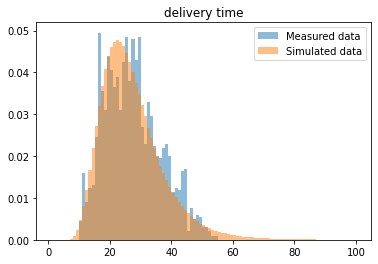

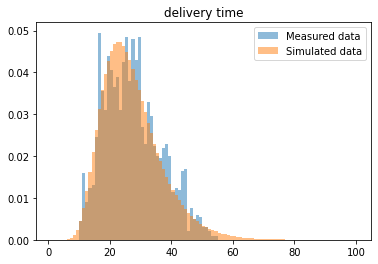

In [12]:
model1_fit = basic_sample.draws_pd()
model2_fit = model2_sample.draws_pd()

bins = np.linspace(1,100,100)

delivery_fit = model1_fit.filter(regex="delivery_time.*")
# df_fit.iloc[:, 8:]
plt.hist(train_df["Time_taken(min)"], bins=bins,density=True, alpha=0.5, label="Measured data")
plt.hist(delivery_fit.values.flatten(),bins=bins,density=True, alpha=0.5, label="Simulated data")
plt.title("delivery time")
plt.legend()
plt.show()

delivery_fit = model2_fit.filter(regex="delivery_time.*")
# df_fit.iloc[:, 8:]
plt.hist(train_df["Time_taken(min)"], bins=bins,density=True, alpha=0.5, label="Measured data")
plt.hist(delivery_fit.values.flatten(),bins=bins,density=True, alpha=0.5, label="Simulated data")
plt.title("delivery time")
plt.legend()
plt.show()

# Comparison

In [8]:
model1_az = az.from_cmdstanpy(
    posterior=basic_sample,
)

model2_az = az.from_cmdstanpy(
    posterior=model2_sample,
)

arviz - WARNING - Array contains NaN-value.
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model2_1,0,-6747.645770,17.296264,0.000000,0.981171,38.058102,0.000000,True,log
model_1,1,-7083.980872,9.146481,336.335102,0.018829,32.960138,25.126862,False,log


Text(0.5, 1.0, 'Comparison of models with LOO criterion')

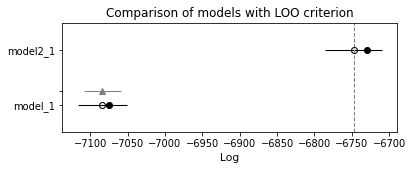

In [9]:
compare_dict = {"model_1": model1_az, "model2_1": model2_az}

loo_diff = az.compare(compare_dict=compare_dict, ic="loo")
display(loo_diff)

ax = az.plot_compare(loo_diff)
ax.set_title("Comparison of models with LOO criterion")

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model2_1,0,-6747.304835,16.955328,0.000000,0.981168,37.957831,0.000000,True,log
model_1,1,-7083.981370,9.146978,336.676535,0.018832,32.960224,24.982687,False,log


Text(0.5, 1.0, 'Comparison of models with LOO criterion')

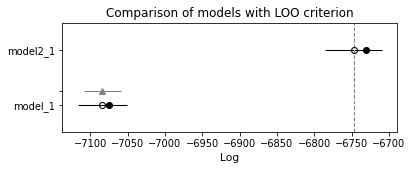

In [10]:
compare_dict = {"model_1": model1_az, "model2_1": model2_az}

loo_diff = az.compare(compare_dict=compare_dict, ic="waic")
display(loo_diff)

ax = az.plot_compare(loo_diff)
ax.set_title("Comparison of models with LOO criterion")